# **Contoh Deep Learning dengan Matriks Evaluasi** 

# Data Preparation

# 1. Import library

In [1]:
!pip install visualkeras
import tensorflow as tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 41.0 MB/s 


# 2. Load Data

In [2]:
from keras.datasets import fashion_mnist

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


# - Visualisasi sample data

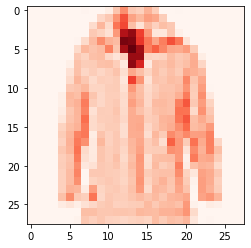

In [4]:
import matplotlib.pyplot as plt

sample_1 = X_train[19].reshape(28,28)
plt.imshow(sample_1, cmap='Reds')

# 3. Preprocessing

In [5]:
# Shapes of training set
print("Training set (images) shape: ", X_train.shape)
print("Training set (labels) shape: ", y_train.shape)
# Shapes of test set
print("Test set (images) shape: ", X_test.shape)
print("Test set (labels) shape: ", y_test.shape)

Training set (images) shape:  (60000, 28, 28)
Training set (labels) shape:  (60000,)
Test set (images) shape:  (10000, 28, 28)
Test set (labels) shape:  (10000,)


# - Labeling dataset

In [6]:
import numpy as np
unique, counts = np.unique(y_train, return_counts=True)
label_dict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
categories = [label_dict[i] for i in unique]

In [10]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
counts

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [7]:
categories

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

# - Visualisasi Categories

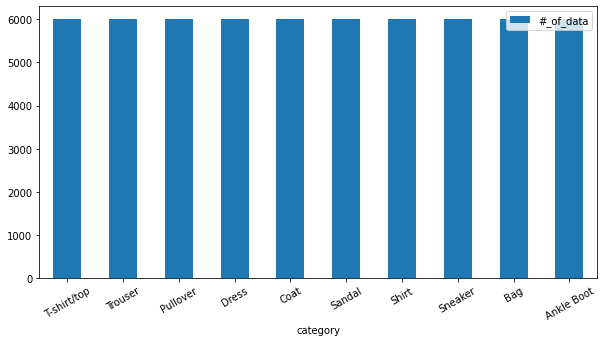

In [11]:
import pandas as pd

lab_count = pd.DataFrame({'category': categories, '#_of_data': counts})
lab_count.plot(kind='bar', x='category', y='#_of_data', figsize=(10,5), rot=30)

# - Reshape Matriks shape

In [13]:
# Mengubah bentuk data dari bentuk vektor ke bentuk matriks
train_X = X_train.reshape(-1, 28, 28, 1)
test_X = X_test.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape) # perubahan dimensi data

(60000, 28, 28, 1) (10000, 28, 28, 1)


# normalisasi and change to default format numpy

In [14]:
# Ubah format dari data
trainX = train_X.astype('float32')/255
testX = test_X.astype('float32')/255

# One hot labeling categorical

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


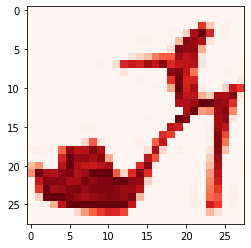

In [16]:
# ubah bentuk data y menjadi bentuk one_hot
from tensorflow.keras.utils import to_categorical

train_y_one_hot = to_categorical(y_train)
test_y_one_hot = to_categorical(y_test)
print(train_y_one_hot[9]) # bentuk one hot data y

sample_1 = X_train[9].reshape(28,28)
plt.imshow(sample_1, cmap='Reds')

# Modeling

In [ ]:
# Model akan dibuat dengan API keras sequential
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization


In [ ]:
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten

model = Sequential()

"""silakan ubah bagian ini"""
model.add(Conv2D(32, 3, padding='same', activation='relu', kernel_initializer='he_normal', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, 3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Conv2D(128, 3,padding='same', activation='relu'))
model.add(Conv2D(128, 3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
"""perubahan sampai bagian ini"""

'perubahan sampai bagian ini'

In [ ]:
# menampilkan layer-layer pada model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, to_file='CNN.png')

from IPython.display import Image
Image('CNN.png')

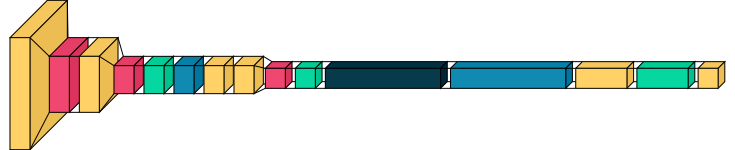

In [ ]:
import visualkeras
visualkeras.layered_view(model)

In [ ]:
import tensorflow.keras as keras
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# 4. Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_X, train_y_one_hot, 
                                                  test_size=.2,
                                                  stratify=train_y_one_hot,
                                                  random_state=21)

# Training Model with split data set

In [ ]:
# training model pada data training
from keras.callbacks import EarlyStopping
eps = 100
batch_size = 128

hst = model.fit(x_train, y_train, epochs=eps, batch_size=batch_size,
                validation_data=(x_val, y_val),
                callbacks=[EarlyStopping(monitor='val_acc', 
                                         patience=3, min_delta=0.001)])

Epoch 1/100
373/375 [============================>.] - ETA: 0s - loss: 0.5794 - accuracy: 0.7916

375/375 [==============================] - 13s 9ms/step - loss: 0.5786 - accuracy: 0.7920 - val_loss: 0.3891 - val_accuracy: 0.8512
Epoch 2/100
375/375 [==============================] - ETA: 0s - loss: 0.3899 - accuracy: 0.8552

375/375 [==============================] - 3s 8ms/step - loss: 0.3899 - accuracy: 0.8552 - val_loss: 0.2980 - val_accuracy: 0.8872
Epoch 3/100
374/375 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8730

375/375 [==============================] - 3s 8ms/step - loss: 0.3414 - accuracy: 0.8731 - val_loss: 0.2704 - val_accuracy: 0.9004
Epoch 4/100
371/375 [============================>.] - ETA: 0s - loss: 0.3143 - accuracy: 0.8832

375/375 [==============================] - 3s 8ms/step - loss: 0.3149 - accuracy: 0.8830 - val_loss: 0.3295 - val_accuracy: 0.8802
Epoch 5/100
372/375 [============================>.] - ETA: 0s - loss: 0.2975 - accuracy: 0.8887

375/375 [==============================] - 3s 8ms/step - loss: 0.2970 - accuracy: 0.8889 - val_loss: 0.2648 - val_accuracy: 0.9050
Epoch 6/100
370/375 [============================>.] - ETA: 0s - loss: 0.2762 - accuracy: 0.8966

375/375 [==============================] - 3s 8ms/step - loss: 0.2763 - accuracy: 0.8966 - val_loss: 0.2363 - val_accuracy: 0.9142
Epoch 7/100
370/375 [============================>.] - ETA: 0s - loss: 0.2629 - accuracy: 0.9014

375/375 [==============================] - 3s 9ms/step - loss: 0.2635 - accuracy: 0.9013 - val_loss: 0.2347 - val_accuracy: 0.9125
Epoch 8/100
370/375 [============================>.] - ETA: 0s - loss: 0.2553 - accuracy: 0.9056

375/375 [==============================] - 3s 8ms/step - loss: 0.2555 - accuracy: 0.9056 - val_loss: 0.2581 - val_accuracy: 0.9062
Epoch 9/100
371/375 [============================>.] - ETA: 0s - loss: 0.2494 - accuracy: 0.9062

375/375 [==============================] - 3s 8ms/step - loss: 0.2498 - accuracy: 0.9060 - val_loss: 0.2129 - val_accuracy: 0.9243
Epoch 10/100
374/375 [============================>.] - ETA: 0s - loss: 0.2369 - accuracy: 0.9113

375/375 [==============================] - 5s 12ms/step - loss: 0.2370 - accuracy: 0.9113 - val_loss: 0.2069 - val_accuracy: 0.9243
Epoch 11/100
372/375 [============================>.] - ETA: 0s - loss: 0.2325 - accuracy: 0.9122

375/375 [==============================] - 4s 11ms/step - loss: 0.2325 - accuracy: 0.9123 - val_loss: 0.2120 - val_accuracy: 0.9237
Epoch 12/100
373/375 [============================>.] - ETA: 0s - loss: 0.2244 - accuracy: 0.9161

375/375 [==============================] - 4s 11ms/step - loss: 0.2242 - accuracy: 0.9161 - val_loss: 0.2156 - val_accuracy: 0.9248
Epoch 13/100
372/375 [============================>.] - ETA: 0s - loss: 0.2216 - accuracy: 0.9169

375/375 [==============================] - 3s 9ms/step - loss: 0.2217 - accuracy: 0.9169 - val_loss: 0.2190 - val_accuracy: 0.9184
Epoch 14/100
373/375 [============================>.] - ETA: 0s - loss: 0.2108 - accuracy: 0.9214

375/375 [==============================] - 3s 8ms/step - loss: 0.2109 - accuracy: 0.9212 - val_loss: 0.2151 - val_accuracy: 0.9235
Epoch 15/100
371/375 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9197

375/375 [==============================] - 3s 8ms/step - loss: 0.2137 - accuracy: 0.9195 - val_loss: 0.2033 - val_accuracy: 0.9260
Epoch 16/100
373/375 [============================>.] - ETA: 0s - loss: 0.2026 - accuracy: 0.9220

375/375 [==============================] - 3s 8ms/step - loss: 0.2024 - accuracy: 0.9222 - val_loss: 0.1920 - val_accuracy: 0.9333
Epoch 17/100
375/375 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.9247

375/375 [==============================] - 3s 8ms/step - loss: 0.1990 - accuracy: 0.9247 - val_loss: 0.2008 - val_accuracy: 0.9303
Epoch 18/100
371/375 [============================>.] - ETA: 0s - loss: 0.1959 - accuracy: 0.9263

375/375 [==============================] - 3s 8ms/step - loss: 0.1954 - accuracy: 0.9265 - val_loss: 0.2095 - val_accuracy: 0.9252
Epoch 19/100
370/375 [============================>.] - ETA: 0s - loss: 0.1881 - accuracy: 0.9278

375/375 [==============================] - 3s 8ms/step - loss: 0.1881 - accuracy: 0.9279 - val_loss: 0.1929 - val_accuracy: 0.9350
Epoch 20/100
372/375 [============================>.] - ETA: 0s - loss: 0.1887 - accuracy: 0.9290

375/375 [==============================] - 3s 8ms/step - loss: 0.1886 - accuracy: 0.9292 - val_loss: 0.2016 - val_accuracy: 0.9307
Epoch 21/100
373/375 [============================>.] - ETA: 0s - loss: 0.1823 - accuracy: 0.9313

375/375 [==============================] - 3s 8ms/step - loss: 0.1827 - accuracy: 0.9313 - val_loss: 0.1923 - val_accuracy: 0.9339
Epoch 22/100
371/375 [============================>.] - ETA: 0s - loss: 0.1781 - accuracy: 0.9331

375/375 [==============================] - 3s 8ms/step - loss: 0.1784 - accuracy: 0.9330 - val_loss: 0.2089 - val_accuracy: 0.9331
Epoch 23/100
375/375 [==============================] - ETA: 0s - loss: 0.1743 - accuracy: 0.9335

375/375 [==============================] - 3s 8ms/step - loss: 0.1743 - accuracy: 0.9335 - val_loss: 0.2345 - val_accuracy: 0.9178
Epoch 24/100
371/375 [============================>.] - ETA: 0s - loss: 0.1655 - accuracy: 0.9373

375/375 [==============================] - 3s 9ms/step - loss: 0.1658 - accuracy: 0.9372 - val_loss: 0.1891 - val_accuracy: 0.9382
Epoch 25/100
372/375 [============================>.] - ETA: 0s - loss: 0.1688 - accuracy: 0.9356

375/375 [==============================] - 3s 8ms/step - loss: 0.1685 - accuracy: 0.9357 - val_loss: 0.1866 - val_accuracy: 0.9349
Epoch 26/100
372/375 [============================>.] - ETA: 0s - loss: 0.1588 - accuracy: 0.9393

375/375 [==============================] - 3s 8ms/step - loss: 0.1590 - accuracy: 0.9392 - val_loss: 0.1901 - val_accuracy: 0.9378
Epoch 27/100
372/375 [============================>.] - ETA: 0s - loss: 0.1643 - accuracy: 0.9371

375/375 [==============================] - 3s 8ms/step - loss: 0.1645 - accuracy: 0.9371 - val_loss: 0.1856 - val_accuracy: 0.9374
Epoch 28/100
373/375 [============================>.] - ETA: 0s - loss: 0.1551 - accuracy: 0.9411

375/375 [==============================] - 3s 9ms/step - loss: 0.1554 - accuracy: 0.9410 - val_loss: 0.1894 - val_accuracy: 0.9355
Epoch 29/100
374/375 [============================>.] - ETA: 0s - loss: 0.1585 - accuracy: 0.9399

375/375 [==============================] - 3s 8ms/step - loss: 0.1583 - accuracy: 0.9400 - val_loss: 0.1851 - val_accuracy: 0.9348
Epoch 30/100
372/375 [============================>.] - ETA: 0s - loss: 0.1530 - accuracy: 0.9422

375/375 [==============================] - 3s 8ms/step - loss: 0.1533 - accuracy: 0.9421 - val_loss: 0.1861 - val_accuracy: 0.9386
Epoch 31/100
375/375 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.9427

375/375 [==============================] - 3s 8ms/step - loss: 0.1520 - accuracy: 0.9427 - val_loss: 0.1872 - val_accuracy: 0.9341
Epoch 32/100
369/375 [============================>.] - ETA: 0s - loss: 0.1474 - accuracy: 0.9430

375/375 [==============================] - 3s 8ms/step - loss: 0.1478 - accuracy: 0.9429 - val_loss: 0.1937 - val_accuracy: 0.9337
Epoch 33/100
372/375 [============================>.] - ETA: 0s - loss: 0.1448 - accuracy: 0.9451

375/375 [==============================] - 3s 8ms/step - loss: 0.1454 - accuracy: 0.9450 - val_loss: 0.1880 - val_accuracy: 0.9378
Epoch 34/100
372/375 [============================>.] - ETA: 0s - loss: 0.1444 - accuracy: 0.9463

375/375 [==============================] - 3s 8ms/step - loss: 0.1444 - accuracy: 0.9463 - val_loss: 0.1928 - val_accuracy: 0.9354
Epoch 35/100
372/375 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9456

375/375 [==============================] - 3s 8ms/step - loss: 0.1417 - accuracy: 0.9456 - val_loss: 0.1867 - val_accuracy: 0.9372
Epoch 36/100
372/375 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9464

375/375 [==============================] - 3s 8ms/step - loss: 0.1413 - accuracy: 0.9464 - val_loss: 0.1971 - val_accuracy: 0.9342
Epoch 37/100
374/375 [============================>.] - ETA: 0s - loss: 0.1344 - accuracy: 0.9486

375/375 [==============================] - 3s 8ms/step - loss: 0.1343 - accuracy: 0.9486 - val_loss: 0.1858 - val_accuracy: 0.9380
Epoch 38/100
375/375 [==============================] - ETA: 0s - loss: 0.1317 - accuracy: 0.9496

375/375 [==============================] - 3s 8ms/step - loss: 0.1317 - accuracy: 0.9496 - val_loss: 0.1887 - val_accuracy: 0.9415
Epoch 39/100
371/375 [============================>.] - ETA: 0s - loss: 0.1316 - accuracy: 0.9505

375/375 [==============================] - 4s 11ms/step - loss: 0.1317 - accuracy: 0.9505 - val_loss: 0.1816 - val_accuracy: 0.9373
Epoch 40/100
369/375 [============================>.] - ETA: 0s - loss: 0.1290 - accuracy: 0.9512

375/375 [==============================] - 3s 8ms/step - loss: 0.1294 - accuracy: 0.9512 - val_loss: 0.1922 - val_accuracy: 0.9385
Epoch 41/100
374/375 [============================>.] - ETA: 0s - loss: 0.1279 - accuracy: 0.9512

375/375 [==============================] - 3s 8ms/step - loss: 0.1279 - accuracy: 0.9511 - val_loss: 0.1983 - val_accuracy: 0.9400
Epoch 42/100
374/375 [============================>.] - ETA: 0s - loss: 0.1261 - accuracy: 0.9510

375/375 [==============================] - 3s 8ms/step - loss: 0.1260 - accuracy: 0.9510 - val_loss: 0.1915 - val_accuracy: 0.9367
Epoch 43/100
374/375 [============================>.] - ETA: 0s - loss: 0.1253 - accuracy: 0.9527

375/375 [==============================] - 3s 9ms/step - loss: 0.1252 - accuracy: 0.9528 - val_loss: 0.1908 - val_accuracy: 0.9397
Epoch 44/100
373/375 [============================>.] - ETA: 0s - loss: 0.1247 - accuracy: 0.9527

375/375 [==============================] - 3s 8ms/step - loss: 0.1250 - accuracy: 0.9525 - val_loss: 0.1968 - val_accuracy: 0.9384
Epoch 45/100
371/375 [============================>.] - ETA: 0s - loss: 0.1222 - accuracy: 0.9533

375/375 [==============================] - 3s 8ms/step - loss: 0.1224 - accuracy: 0.9532 - val_loss: 0.1928 - val_accuracy: 0.9406
Epoch 46/100
374/375 [============================>.] - ETA: 0s - loss: 0.1204 - accuracy: 0.9545

375/375 [==============================] - 3s 8ms/step - loss: 0.1203 - accuracy: 0.9545 - val_loss: 0.1948 - val_accuracy: 0.9409
Epoch 47/100
371/375 [============================>.] - ETA: 0s - loss: 0.1147 - accuracy: 0.9558

375/375 [==============================] - 3s 9ms/step - loss: 0.1148 - accuracy: 0.9558 - val_loss: 0.1857 - val_accuracy: 0.9385
Epoch 48/100
371/375 [============================>.] - ETA: 0s - loss: 0.1163 - accuracy: 0.9565

375/375 [==============================] - 3s 8ms/step - loss: 0.1165 - accuracy: 0.9565 - val_loss: 0.1860 - val_accuracy: 0.9398
Epoch 49/100
370/375 [============================>.] - ETA: 0s - loss: 0.1148 - accuracy: 0.9557

375/375 [==============================] - 3s 8ms/step - loss: 0.1148 - accuracy: 0.9557 - val_loss: 0.1927 - val_accuracy: 0.9411
Epoch 50/100
371/375 [============================>.] - ETA: 0s - loss: 0.1145 - accuracy: 0.9565

375/375 [==============================] - 3s 8ms/step - loss: 0.1145 - accuracy: 0.9565 - val_loss: 0.1984 - val_accuracy: 0.9394
Epoch 51/100
372/375 [============================>.] - ETA: 0s - loss: 0.1098 - accuracy: 0.9573

375/375 [==============================] - 3s 8ms/step - loss: 0.1096 - accuracy: 0.9574 - val_loss: 0.1917 - val_accuracy: 0.9392
Epoch 52/100
374/375 [============================>.] - ETA: 0s - loss: 0.1102 - accuracy: 0.9577

375/375 [==============================] - 3s 8ms/step - loss: 0.1102 - accuracy: 0.9577 - val_loss: 0.1930 - val_accuracy: 0.9390
Epoch 53/100
373/375 [============================>.] - ETA: 0s - loss: 0.1096 - accuracy: 0.9596

375/375 [==============================] - 3s 8ms/step - loss: 0.1097 - accuracy: 0.9596 - val_loss: 0.1917 - val_accuracy: 0.9387
Epoch 54/100
370/375 [============================>.] - ETA: 0s - loss: 0.1076 - accuracy: 0.9585

375/375 [==============================] - 3s 8ms/step - loss: 0.1074 - accuracy: 0.9586 - val_loss: 0.1936 - val_accuracy: 0.9408
Epoch 55/100
371/375 [============================>.] - ETA: 0s - loss: 0.1106 - accuracy: 0.9581

375/375 [==============================] - 3s 8ms/step - loss: 0.1108 - accuracy: 0.9580 - val_loss: 0.1878 - val_accuracy: 0.9423
Epoch 56/100
371/375 [============================>.] - ETA: 0s - loss: 0.1073 - accuracy: 0.9594

375/375 [==============================] - 3s 8ms/step - loss: 0.1076 - accuracy: 0.9592 - val_loss: 0.1977 - val_accuracy: 0.9387
Epoch 57/100
371/375 [============================>.] - ETA: 0s - loss: 0.1042 - accuracy: 0.9607

375/375 [==============================] - 3s 8ms/step - loss: 0.1042 - accuracy: 0.9608 - val_loss: 0.1934 - val_accuracy: 0.9413
Epoch 58/100
370/375 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9606

375/375 [==============================] - 3s 8ms/step - loss: 0.1050 - accuracy: 0.9604 - val_loss: 0.1909 - val_accuracy: 0.9405
Epoch 59/100
372/375 [============================>.] - ETA: 0s - loss: 0.1019 - accuracy: 0.9609

375/375 [==============================] - 3s 8ms/step - loss: 0.1020 - accuracy: 0.9609 - val_loss: 0.2068 - val_accuracy: 0.9383
Epoch 60/100
371/375 [============================>.] - ETA: 0s - loss: 0.1037 - accuracy: 0.9606

375/375 [==============================] - 3s 8ms/step - loss: 0.1043 - accuracy: 0.9605 - val_loss: 0.1988 - val_accuracy: 0.9410
Epoch 61/100
369/375 [============================>.] - ETA: 0s - loss: 0.1032 - accuracy: 0.9608

375/375 [==============================] - 3s 8ms/step - loss: 0.1030 - accuracy: 0.9607 - val_loss: 0.2042 - val_accuracy: 0.9375
Epoch 62/100
374/375 [============================>.] - ETA: 0s - loss: 0.1012 - accuracy: 0.9620

375/375 [==============================] - 3s 8ms/step - loss: 0.1012 - accuracy: 0.9620 - val_loss: 0.2118 - val_accuracy: 0.9342
Epoch 63/100
374/375 [============================>.] - ETA: 0s - loss: 0.1011 - accuracy: 0.9607

375/375 [==============================] - 3s 9ms/step - loss: 0.1012 - accuracy: 0.9606 - val_loss: 0.1913 - val_accuracy: 0.9402
Epoch 64/100
375/375 [==============================] - ETA: 0s - loss: 0.1002 - accuracy: 0.9630

375/375 [==============================] - 3s 8ms/step - loss: 0.1002 - accuracy: 0.9630 - val_loss: 0.1912 - val_accuracy: 0.9408
Epoch 65/100
369/375 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9625

375/375 [==============================] - 3s 8ms/step - loss: 0.0967 - accuracy: 0.9625 - val_loss: 0.2154 - val_accuracy: 0.9354
Epoch 66/100
375/375 [==============================] - ETA: 0s - loss: 0.0981 - accuracy: 0.9630

375/375 [==============================] - 3s 8ms/step - loss: 0.0981 - accuracy: 0.9630 - val_loss: 0.2014 - val_accuracy: 0.9387
Epoch 67/100
371/375 [============================>.] - ETA: 0s - loss: 0.0969 - accuracy: 0.9633

375/375 [==============================] - 3s 8ms/step - loss: 0.0968 - accuracy: 0.9632 - val_loss: 0.2085 - val_accuracy: 0.9380
Epoch 68/100
370/375 [============================>.] - ETA: 0s - loss: 0.0925 - accuracy: 0.9649

375/375 [==============================] - 3s 8ms/step - loss: 0.0927 - accuracy: 0.9649 - val_loss: 0.2042 - val_accuracy: 0.9410
Epoch 69/100
373/375 [============================>.] - ETA: 0s - loss: 0.0919 - accuracy: 0.9652

375/375 [==============================] - 3s 8ms/step - loss: 0.0918 - accuracy: 0.9653 - val_loss: 0.2108 - val_accuracy: 0.9415
Epoch 70/100
372/375 [============================>.] - ETA: 0s - loss: 0.0939 - accuracy: 0.9643

375/375 [==============================] - 3s 8ms/step - loss: 0.0939 - accuracy: 0.9643 - val_loss: 0.2110 - val_accuracy: 0.9396
Epoch 71/100
370/375 [============================>.] - ETA: 0s - loss: 0.0930 - accuracy: 0.9658

375/375 [==============================] - 3s 8ms/step - loss: 0.0930 - accuracy: 0.9659 - val_loss: 0.2047 - val_accuracy: 0.9425
Epoch 72/100
373/375 [============================>.] - ETA: 0s - loss: 0.0924 - accuracy: 0.9652

375/375 [==============================] - 3s 8ms/step - loss: 0.0924 - accuracy: 0.9652 - val_loss: 0.2043 - val_accuracy: 0.9401
Epoch 73/100
372/375 [============================>.] - ETA: 0s - loss: 0.0921 - accuracy: 0.9655

375/375 [==============================] - 3s 8ms/step - loss: 0.0919 - accuracy: 0.9656 - val_loss: 0.2010 - val_accuracy: 0.9424
Epoch 74/100
371/375 [============================>.] - ETA: 0s - loss: 0.0904 - accuracy: 0.9662

375/375 [==============================] - 3s 8ms/step - loss: 0.0905 - accuracy: 0.9662 - val_loss: 0.2132 - val_accuracy: 0.9411
Epoch 75/100
372/375 [============================>.] - ETA: 0s - loss: 0.0899 - accuracy: 0.9665

375/375 [==============================] - 3s 8ms/step - loss: 0.0901 - accuracy: 0.9664 - val_loss: 0.2258 - val_accuracy: 0.9359
Epoch 76/100
373/375 [============================>.] - ETA: 0s - loss: 0.0851 - accuracy: 0.9683

375/375 [==============================] - 3s 8ms/step - loss: 0.0854 - accuracy: 0.9682 - val_loss: 0.2268 - val_accuracy: 0.9393
Epoch 77/100
372/375 [============================>.] - ETA: 0s - loss: 0.0848 - accuracy: 0.9676

375/375 [==============================] - 3s 8ms/step - loss: 0.0847 - accuracy: 0.9677 - val_loss: 0.2124 - val_accuracy: 0.9408
Epoch 78/100
370/375 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9671

375/375 [==============================] - 3s 8ms/step - loss: 0.0864 - accuracy: 0.9672 - val_loss: 0.2184 - val_accuracy: 0.9407
Epoch 79/100
370/375 [============================>.] - ETA: 0s - loss: 0.0840 - accuracy: 0.9689

375/375 [==============================] - 3s 8ms/step - loss: 0.0839 - accuracy: 0.9689 - val_loss: 0.2038 - val_accuracy: 0.9405
Epoch 80/100
372/375 [============================>.] - ETA: 0s - loss: 0.0819 - accuracy: 0.9690

375/375 [==============================] - 3s 8ms/step - loss: 0.0817 - accuracy: 0.9690 - val_loss: 0.2251 - val_accuracy: 0.9405
Epoch 81/100
372/375 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9690

375/375 [==============================] - 3s 8ms/step - loss: 0.0843 - accuracy: 0.9689 - val_loss: 0.2446 - val_accuracy: 0.9402
Epoch 82/100
369/375 [============================>.] - ETA: 0s - loss: 0.0864 - accuracy: 0.9685

375/375 [==============================] - 3s 8ms/step - loss: 0.0863 - accuracy: 0.9686 - val_loss: 0.2078 - val_accuracy: 0.9417
Epoch 83/100
371/375 [============================>.] - ETA: 0s - loss: 0.0834 - accuracy: 0.9690

375/375 [==============================] - 3s 8ms/step - loss: 0.0833 - accuracy: 0.9691 - val_loss: 0.2226 - val_accuracy: 0.9404
Epoch 84/100
370/375 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9688

375/375 [==============================] - 3s 8ms/step - loss: 0.0822 - accuracy: 0.9689 - val_loss: 0.2160 - val_accuracy: 0.9392
Epoch 85/100
371/375 [============================>.] - ETA: 0s - loss: 0.0788 - accuracy: 0.9713

375/375 [==============================] - 3s 8ms/step - loss: 0.0793 - accuracy: 0.9712 - val_loss: 0.2206 - val_accuracy: 0.9408
Epoch 86/100
369/375 [============================>.] - ETA: 0s - loss: 0.0807 - accuracy: 0.9699

375/375 [==============================] - 3s 8ms/step - loss: 0.0807 - accuracy: 0.9699 - val_loss: 0.2112 - val_accuracy: 0.9416
Epoch 87/100
371/375 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9711

375/375 [==============================] - 3s 8ms/step - loss: 0.0783 - accuracy: 0.9710 - val_loss: 0.2232 - val_accuracy: 0.9372
Epoch 88/100
373/375 [============================>.] - ETA: 0s - loss: 0.0800 - accuracy: 0.9705

375/375 [==============================] - 3s 8ms/step - loss: 0.0800 - accuracy: 0.9705 - val_loss: 0.2187 - val_accuracy: 0.9411
Epoch 89/100
371/375 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9709

375/375 [==============================] - 3s 8ms/step - loss: 0.0799 - accuracy: 0.9708 - val_loss: 0.2051 - val_accuracy: 0.9407
Epoch 90/100
371/375 [============================>.] - ETA: 0s - loss: 0.0790 - accuracy: 0.9713

375/375 [==============================] - 3s 8ms/step - loss: 0.0790 - accuracy: 0.9713 - val_loss: 0.2235 - val_accuracy: 0.9406
Epoch 91/100
371/375 [============================>.] - ETA: 0s - loss: 0.0791 - accuracy: 0.9709

375/375 [==============================] - 3s 8ms/step - loss: 0.0800 - accuracy: 0.9707 - val_loss: 0.2183 - val_accuracy: 0.9394
Epoch 92/100
369/375 [============================>.] - ETA: 0s - loss: 0.0751 - accuracy: 0.9718

375/375 [==============================] - 3s 8ms/step - loss: 0.0754 - accuracy: 0.9718 - val_loss: 0.2168 - val_accuracy: 0.9422
Epoch 93/100
374/375 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9722

375/375 [==============================] - 3s 8ms/step - loss: 0.0756 - accuracy: 0.9721 - val_loss: 0.2095 - val_accuracy: 0.9383
Epoch 94/100
370/375 [============================>.] - ETA: 0s - loss: 0.0768 - accuracy: 0.9711

375/375 [==============================] - 3s 8ms/step - loss: 0.0766 - accuracy: 0.9712 - val_loss: 0.2087 - val_accuracy: 0.9391
Epoch 95/100
370/375 [============================>.] - ETA: 0s - loss: 0.0796 - accuracy: 0.9706

375/375 [==============================] - 3s 8ms/step - loss: 0.0797 - accuracy: 0.9706 - val_loss: 0.2140 - val_accuracy: 0.9417
Epoch 96/100
372/375 [============================>.] - ETA: 0s - loss: 0.0743 - accuracy: 0.9730

375/375 [==============================] - 3s 8ms/step - loss: 0.0744 - accuracy: 0.9729 - val_loss: 0.2212 - val_accuracy: 0.9417
Epoch 97/100
370/375 [============================>.] - ETA: 0s - loss: 0.0766 - accuracy: 0.9723

375/375 [==============================] - 3s 8ms/step - loss: 0.0767 - accuracy: 0.9722 - val_loss: 0.2441 - val_accuracy: 0.9408
Epoch 98/100
369/375 [============================>.] - ETA: 0s - loss: 0.0726 - accuracy: 0.9729

375/375 [==============================] - 3s 8ms/step - loss: 0.0728 - accuracy: 0.9730 - val_loss: 0.2142 - val_accuracy: 0.9429
Epoch 99/100
371/375 [============================>.] - ETA: 0s - loss: 0.0756 - accuracy: 0.9720

375/375 [==============================] - 3s 8ms/step - loss: 0.0759 - accuracy: 0.9720 - val_loss: 0.2451 - val_accuracy: 0.9430
Epoch 100/100
371/375 [============================>.] - ETA: 0s - loss: 0.0703 - accuracy: 0.9735

375/375 [==============================] - 3s 8ms/step - loss: 0.0702 - accuracy: 0.9735 - val_loss: 0.2247 - val_accuracy: 0.9429


# Evaluate Model

313/313 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.9345
Test loss 0.255161315202713
Test accuracy 0.934499979019165
313/313 [==============================] - 1s 2ms/step
9


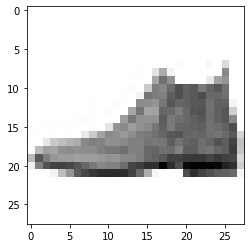

In [ ]:
test_loss, test_acc = model.evaluate(test_X, test_y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

plt.imshow(test_X[0].reshape(28,28), cmap=plt.cm.binary)
plt.show()

# Visualisasi Model evaluasi

Model Underfiting

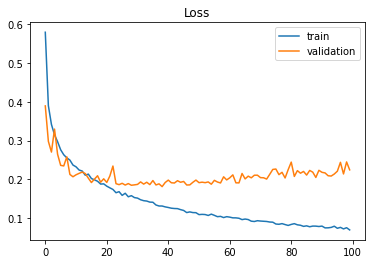

In [ ]:
# visualisasi loss tiap epoch
import matplotlib.pyplot as plt

plt.title('Loss')
plt.plot(hst.history['loss'], label='train')
plt.plot(hst.history['val_loss'], label='validation')
plt.legend()
plt.show()

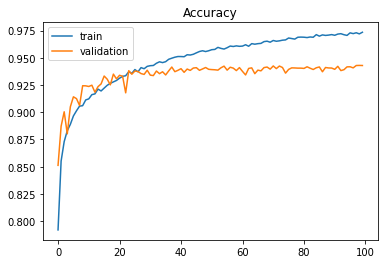

In [ ]:
# visualisasi accuracy tiap epoch
plt.title('Accuracy')
plt.plot(hst.history['accuracy'], label='train')
plt.plot(hst.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

# Deep Evaluasi With confusion Matriks 

In [ ]:
# Membuat fungsi untuk menampilkan Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Fungsi ini digunakan untuk menampilkan confusion matrix.
    Normalisasi diatur dengan cara `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("confusion matrix yang dinormalisasi")
    else:
        print('Confusion matrix, tanpa normalisasi')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

#     plt.tight_layout()
    plt.ylabel('Label Asli')
    plt.xlabel('Label Hasil Prediksi')

In [ ]:
y_pred = [np.argmax(y, axis=None, out=None) for y in predictions]
y_real = [np.argmax(y, axis=None, out=None) for y in test_y_one_hot]

Confusion matrix, tanpa normalisasi
[[869   0  11  14   0   0  68   0   1   0]
 [  0 990   1   8   0   0   2   0   1   0]
 [ 18   0 926   8  30   0  49   0   1   1]
 [  7   5   5 924  27   0  16   0   2   0]
 [  3   0  34  18 899   0  51   0   1   0]
 [  0   0   0   0   0 991   0   9   2   4]
 [ 98   3  23  28  43   0 812   0   2   0]
 [  0   0   0   0   0   4   0 975   0  26]
 [  5   2   0   0   1   0   2   1 990   0]
 [  0   0   0   0   0   5   0  15   0 969]]


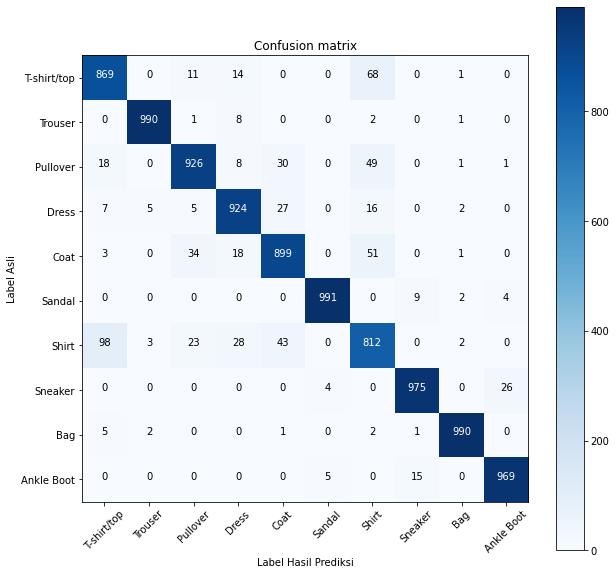

In [ ]:
# Membuat confusion matrix

cnf_matrix = confusion_matrix(y_pred, y_real, labels=list(range(10)))
np.set_printoptions(precision=1)


# Plot confusion matrix tanpa normalisasi
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=categories,
                      normalize=False,  title='Confusion matrix')

In [ ]:
print(classification_report(y_real, y_pred)) #menampilkan precission, recall, f1-score & support

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.93      0.91      1000
           3       0.94      0.92      0.93      1000
           4       0.89      0.90      0.90      1000
           5       0.99      0.99      0.99      1000
           6       0.80      0.81      0.81      1000
           7       0.97      0.97      0.97      1000
           8       0.99      0.99      0.99      1000
           9       0.98      0.97      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



# Kesimpulan : 
- Model mengalami underfiting dengan validasi loss > train loss  
- Model mengalami balance performance dalam menentukan precision dan recall, sehingga kualitas model baik dalam membedakan tp atau tn dan baik dalam sensitivitas dalam menentukan tp rate namun tidak baik jika di jalankan dalam data pattern yang lebih kompleks karena pada validasi mengalami loss yg lebih tinggi
